### Demonstration of the circumscribe contours as a visualization method 

In [1]:
#install shapely package for handling convex hull - collision detection
import sys
!{sys.executable} -m pip install shapely

     |████████████████████████████████| 1.5MB 51.5MB/s eta 0:00:01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from circumscribe import circumscribe_contours

In [10]:
#generate a test set
#this is designed to require nonconvex curves
n_points = 50
p1a = np.random.normal(loc=[25, 25], scale = 5, size=[n_points,2])
p1b = np.random.normal(loc=[50, 25], scale = 5, size=[n_points,2])
p1c = np.random.normal(loc=[25, 50], scale = 5, size=[n_points,2])
p1 = np.concatenate([p1a, p1b, p1c], axis=0)
p2 = np.random.normal(loc=[50, 50], scale = 5,  size=[n_points,2])
x_full = np.concatenate([p1[:,0], p2[:,0]], axis=0)
y_full = np.concatenate([p1[:,1], p2[:,1]], axis=0)
labels = np.concatenate([np.ones([3*n_points]), 2*np.ones([n_points])], axis=0).astype(int)

In [11]:
#compute contours
#choose parameters such that we get a high-quality plot, at expense of a few seconds computation time
t0 = time.time()
S = circumscribe_contours(x_full, y_full, labels, margins=[10,10], sigma=1, n_pixels=[150,150])
t_elapsed = time.time() - t0
print("Elapsed time for computing circumscribe contours = %.3f s"%t_elapsed)



Elapsed time for computing circumscribe contours = 8.464 s


<Figure size 432x288 with 0 Axes>

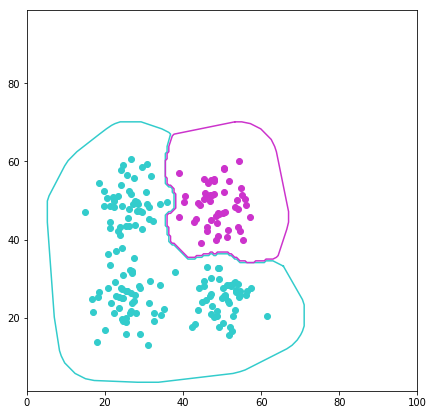

In [12]:
#plot the data points and the contours
#for this example, both the data points and the contours
#are drawn in same colors
plt.clf()
plt.figure(figsize=(7,7))
plt.scatter(p1[:,0], p1[:,1],color=[0.2, 0.8, 0.8])
plt.scatter(p2[:,0], p2[:,1],color=[0.8, 0.2, 0.8])

colors = [[0.2, 0.8, 0.8], [0.8, 0.2, 0.8]]

classes = [1,2]

for k, c in enumerate(classes):
    contours = S[c]
    for contour in contours:
        plt.plot(contour[:,0], contour[:,1], color = colors[k])

#plt.axis('equal')
plt.axis('equal')
plt.ylim((0, 100))
plt.xlim((0, 100))



plt.show()